In [23]:
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import pandas as pd
import pandasql as ps
import random
import seaborn as sns
import warnings
import itertools
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16.0, 6.0]

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [6]:
data.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
ps.sqldf("SELECT count(*) FROM data")

,count(*)
0,20640


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

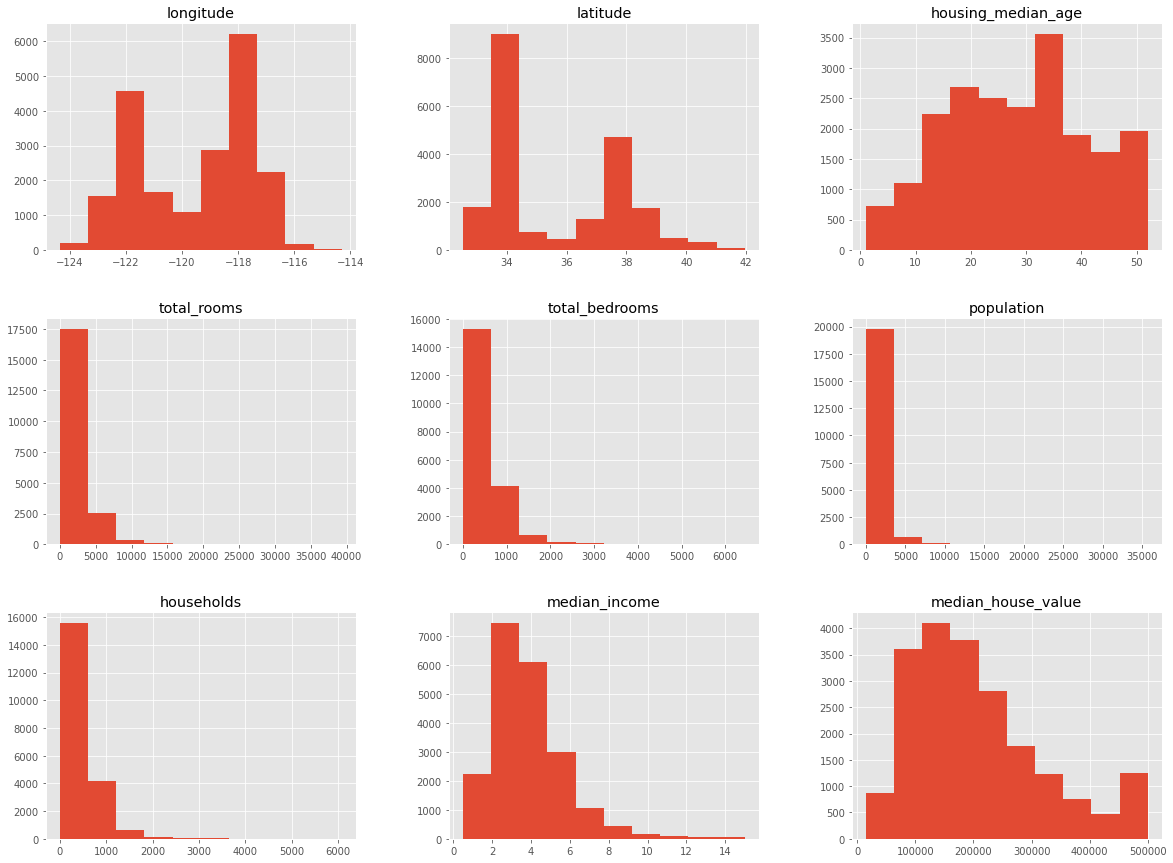

In [9]:
data.hist(figsize=(20,15))

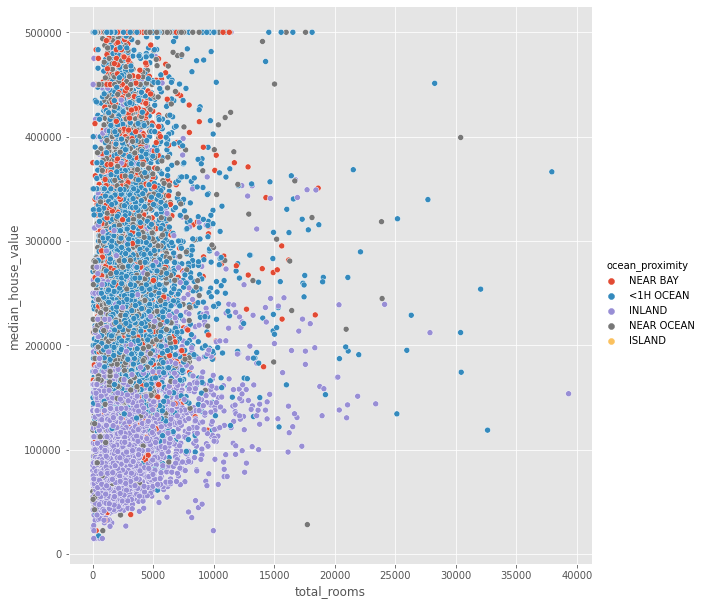

In [10]:
sns.relplot(data=data, x='total_rooms', y='median_house_value', hue='ocean_proximity', height=8.27)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

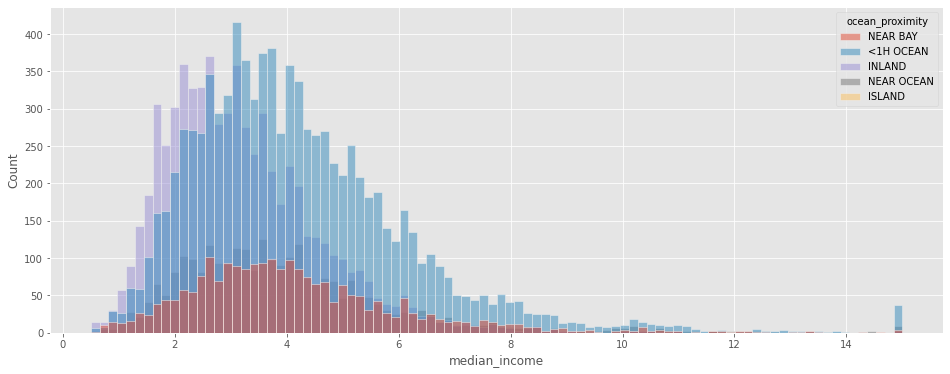

In [11]:
sns.histplot(data=data, x='median_income', hue='ocean_proximity')

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

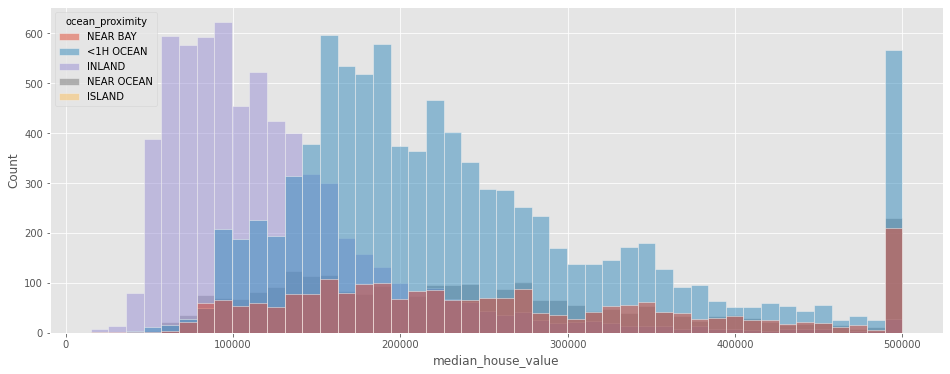

In [12]:
sns.histplot(data=data, x='median_house_value', hue='ocean_proximity')

<AxesSubplot:xlabel='population', ylabel='Count'>

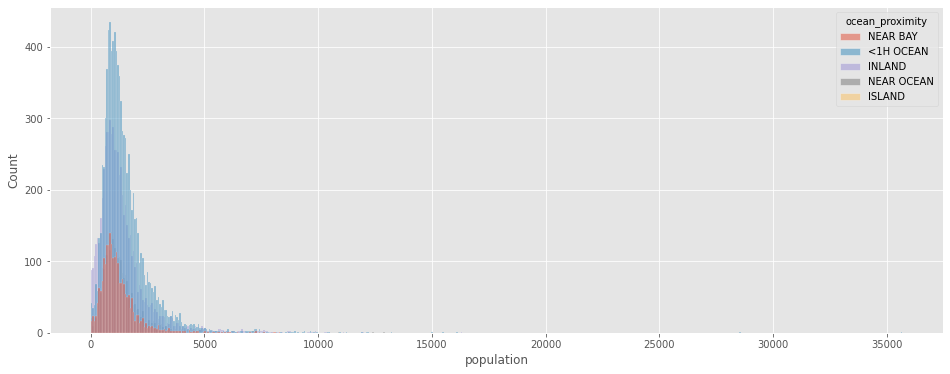

In [13]:
sns.histplot(data=data, x='population', hue='ocean_proximity')

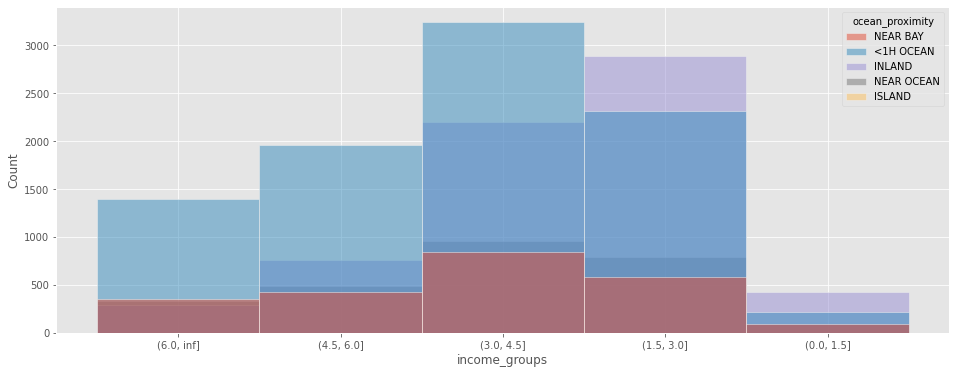

In [14]:
data['income_groups'] = pd.cut(data['median_income'], [0., 1.5, 3.0, 4.5, 6., np.inf]).astype(str)
sns.histplot(data=data, x='income_groups', hue='ocean_proximity')
data = data.drop('income_groups', axis=1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

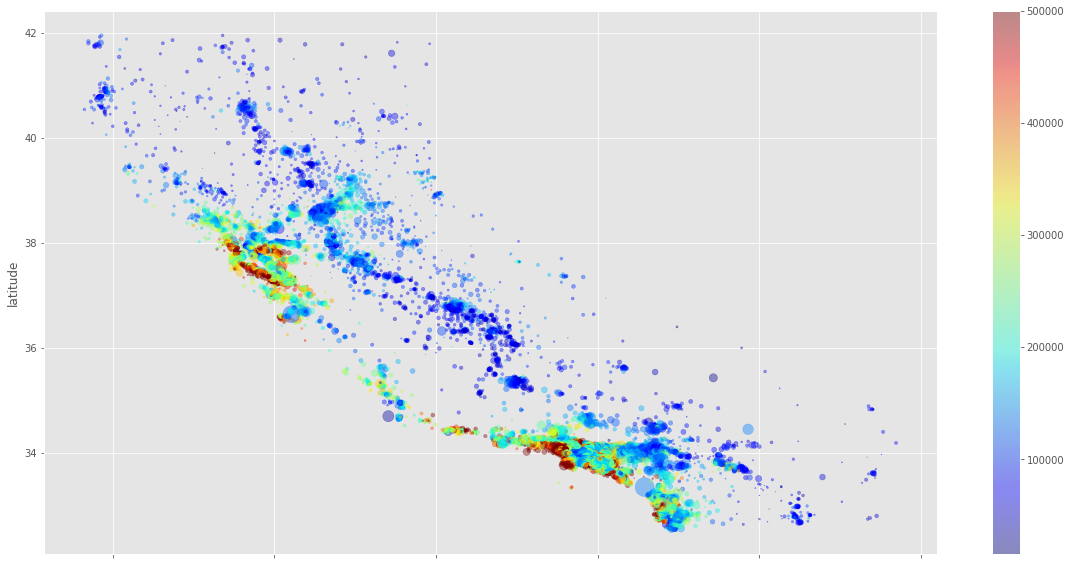

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s=data["population"]/100, figsize=(20,10),
       c=data["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True
)

In [16]:
corr_matrix = pd.get_dummies(data, columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

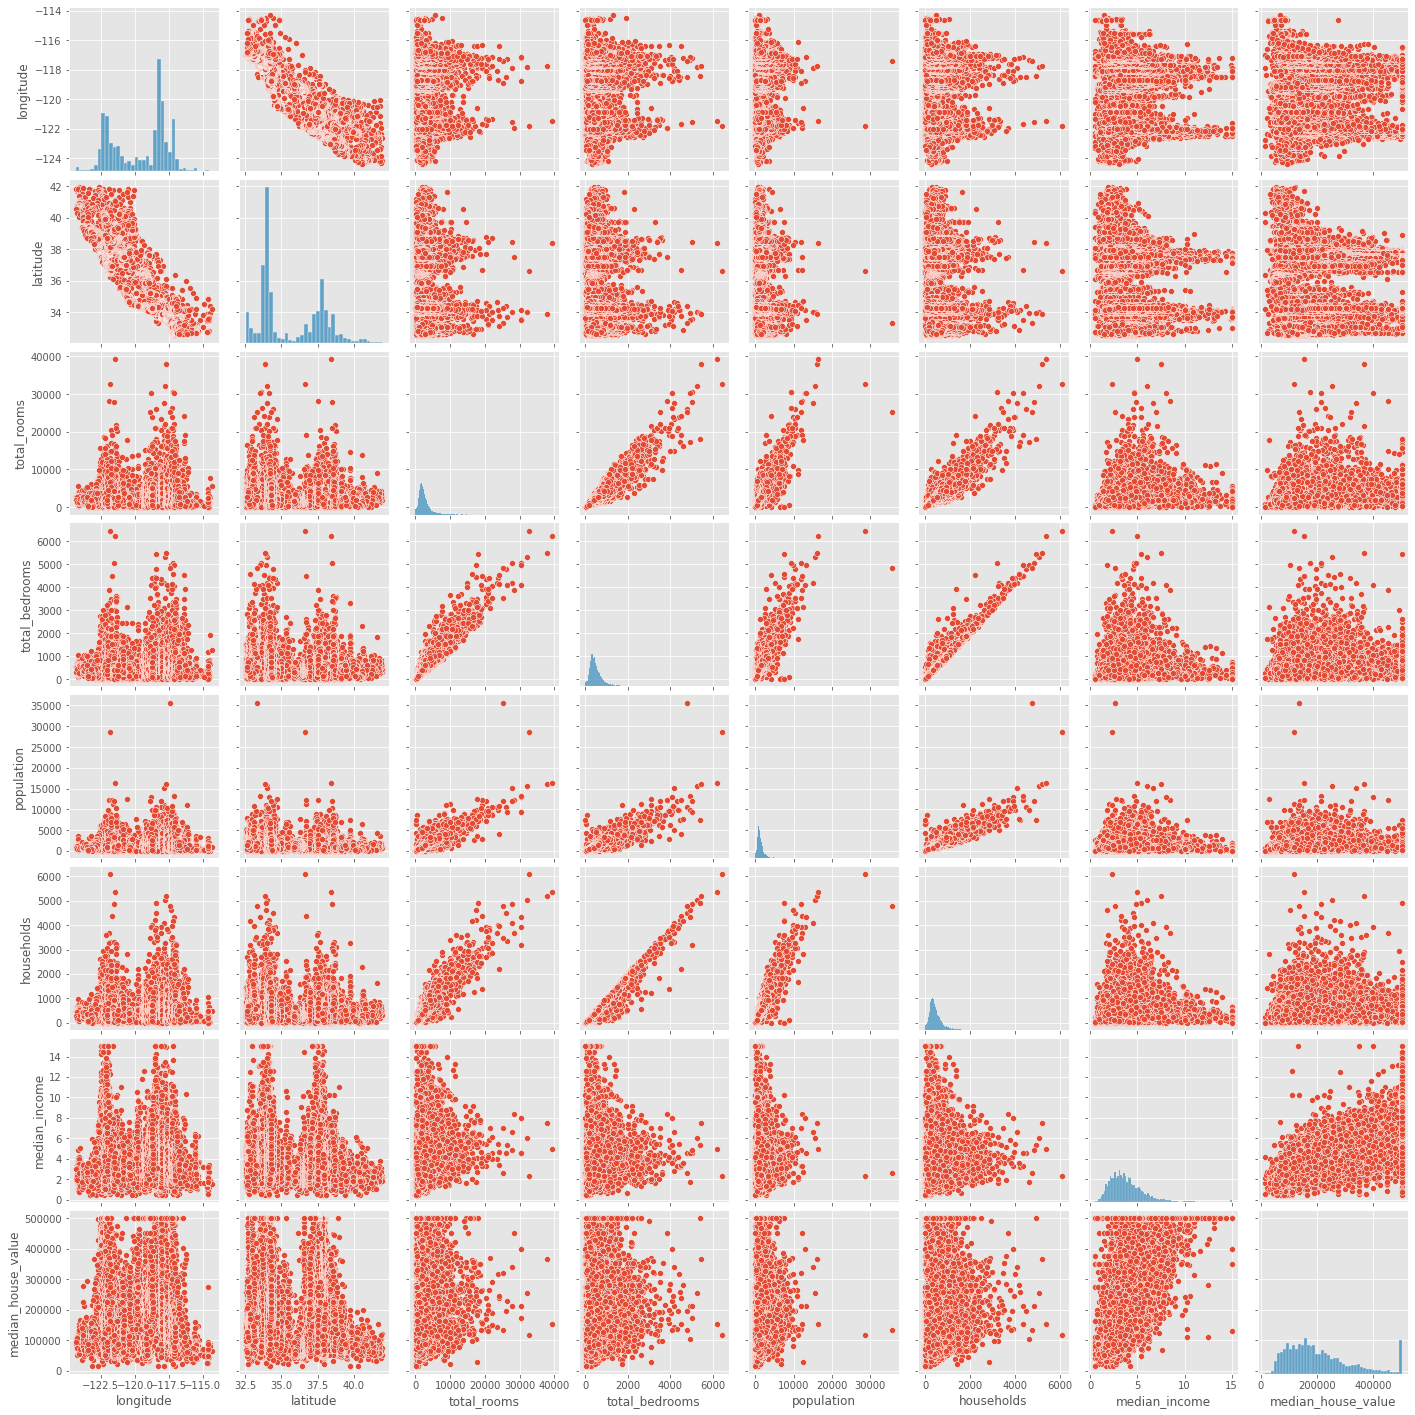

In [17]:
sns.pairplot(data.drop('housing_median_age', axis=1))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

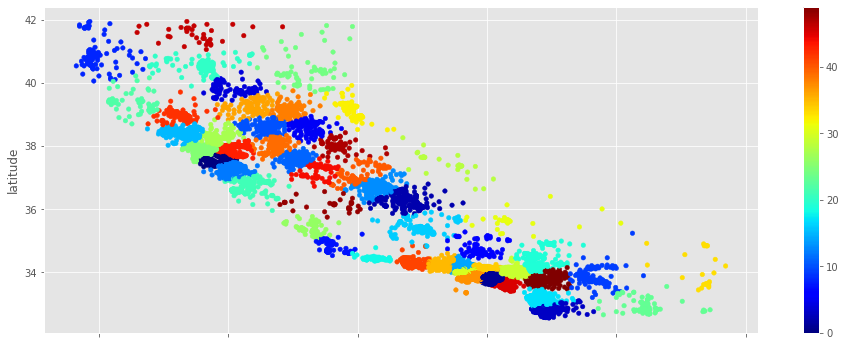

In [18]:
kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(data[['longitude', 'latitude']])

cdata = data
cdata['group'] = kmeans.labels_
cdata.plot(kind="scatter", x="longitude", y="latitude", c=data["group"], cmap=plt.get_cmap("jet"), colorbar=True)

In [19]:
ready_data = pd.get_dummies(data, columns=['ocean_proximity', 'group'])
ready_data['total_bedrooms'] = ready_data['total_bedrooms'].fillna(ready_data['total_bedrooms'].mean())

def normalize(column):
    ready_data[column] = MinMaxScaler().fit_transform(ready_data[column].to_numpy().reshape(-1, 1))
    
for c in ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
          'households', 'median_income', 'median_house_value']:
    normalize(c)
    
ready_data = ready_data.drop(['housing_median_age'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(ready_data.drop("median_house_value", axis=1), ready_data['median_house_value'], random_state=1234)

#model = SVR()
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Test score: " + str(model.score(X_test, y_test)))
print("Cross val score: " + str(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)))

Test score: 0.8180290338785434
Cross val score: [0.83949599 0.84283539 0.8196572  0.81018153 0.83517679 0.81478976
 0.82837665 0.82403613 0.82276622 0.83405242]


In [30]:
ready_data = pd.get_dummies(data, columns=['ocean_proximity', 'group'])
ready_data['total_bedrooms'] = ready_data['total_bedrooms'].fillna(ready_data['total_bedrooms'].mean())

def normalize(column):
    ready_data[column] = MinMaxScaler().fit_transform(ready_data[column].to_numpy().reshape(-1, 1))
    
for c in ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
          'households', 'median_income', 'median_house_value']:
    normalize(c)
    
ready_data = ready_data.drop(['housing_median_age'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(ready_data.drop("median_house_value", axis=1), ready_data['median_house_value'], random_state=1234)

model = Pipeline([
    ("svm_reg", SVR(kernel="poly", degree=3, coef0=1, C=5))
])

model.fit(X_train, y_train)
print("Test score: " + str(model.score(X_test, y_test)))
print("Cross val score: " + str(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)))

Test score: 0.7625872039873397
Cross val score: [0.79230202 0.79464072 0.77732052 0.75719215 0.75855521 0.76913898
 0.75088456 0.77536637 0.75399955 0.77520764]


In [32]:
import tensorflow as tf
from tensorflow import keras

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=30)
model.evaluate(X_test, y_test)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 300)               18900     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 301       
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0518
Epoch 2/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0300
Epoch 3/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0252
Epoch 4/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0224
Epoch 5/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0215
Epoch 6/30
484/484 [==============================] - 1s 1ms/step - loss: 0.0204
Epoch 7/30
484/484 [=====

0.01875419169664383